# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [149]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import pylab

df = pd.read_csv('human_body_temperature.csv')

In [150]:
# Your work here.

# 1. Is the distribution of body temperatures normal?

In [151]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


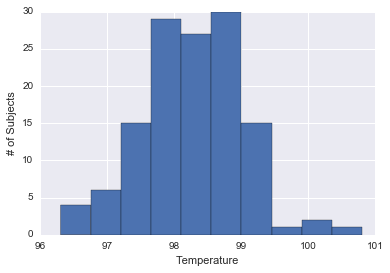

In [152]:
# Graphical Normality Test

_ = plt.hist(df['temperature'])
_ = plt.xlabel('Temperature')
_ = plt.ylabel('# of Subjects')
plt.show()

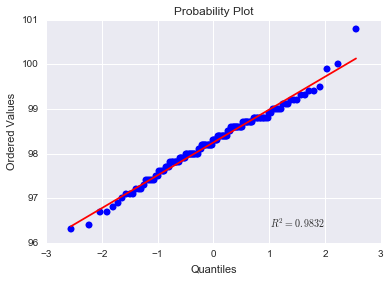

In [153]:
# Normality Test with a QQ Plot

temp_norm = stats.probplot(df['temperature'], dist='norm', plot=pylab)

For a distribution to be considered normal, the data points plotted in a QQ plot must fall approximately on a straight line. 

According to both the QQ plot and histogram above, the distribution of body temperatures is normal.

# 2. Is the sample size large? Are the observations independent?

According to the Central Limit Theorem, a sample size is sufficiently large when n > 30. In the case of the human body temperature dataset, n = 130, and thus the sample size is large. 

In terms of independence, it is unclear if the observations were taken from a sample with replacement. 
However, if the assumption is made that n = 130 is less than 10% of the entire population, the observations can be deemed independent. 

# 3. Is the true population mean really 98.6 degrees F?

In [154]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [155]:
df_temp = df['temperature']

In [156]:
# Bootstrap Hypothesis Test

$H_{o}$ = 98.6 degrees F

$H_{a}$ != 98.6 degrees F

α = 0.05

In [157]:
# Generating a bootstrap sample

for _ in range(1000):
    bs_sample = np.random.choice(df_temp, size=len(df_temp))

In [158]:
# Bootstrap replicate function

def bootstrap_replicate_1d(data, func):
    bs_sample = np.random.choice(df_temp, size=len(df_temp))
    return func(bs_sample)

In [159]:
# Generating many bootstrap replicates

def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(1000)
    for x in range(1000):
        bs_replicates[x] = bootstrap_replicate_1d(data, func)
        return bs_replicates

In [160]:
# Array of 'shifted' means

shifted = df_temp - np.mean(df_temp) + 98.6
shifted.mean()

98.600000000000009

In [161]:
bs_replicates = draw_bs_reps(shifted, np.mean, 1000)

In [162]:
p = np.sum(bs_replicates <= np.mean(df_temp))/1000 

print('P Value' + ': ' + str(p))

P Value: 0


Based on the bootstrap sample, the p-value = 0. As the p-value is lower than the 0.05 significance level, the null hypothesis is rejected for the alternate which states that the true population mean is really not 98.6 degrees F.

In [163]:
# Frequentist Statistical Test

- Would you use a one-sample or two-sample test? Why?

I will use a one-sample t-test because one set of data is being compared to a single statistic, i.e. a mean of 98.6 degrees F.mA two-sample test would be used if two sets of data were being compared. 

- In this situation, is it appropriate to use the t or z statistic?

The t statistic is appropriate in this situation because the test statistic is a mean, and not a proportion. Furthermore, calculation of the t statistic can be derived using the sample standard deviation, whereas derivation of the z statistic requires the population standard deviation, which is not available.

$H_{o}$ = 98.6 degrees F

$H_{a}$ != 98.6 degrees F

α = 0.05

In [187]:
n = 130
pop_mean = 98.6
sample_mean = np.mean(df_temp)
sample_std_dev = np.std(df_temp)

In [188]:
t_score = (sample_mean - pop_mean)/(sample_std_dev/np.sqrt(n))
print('T Score' + ': ' + str(t_score))

T Score: -5.47592520208


In [190]:
# One-Sample T-Test

stats.ttest_1samp(df_temp, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

As the p-value = 2.4106320415561276e-07 is lower than the 0.05 significance level, the null hypothesis is rejected for the alternate which states that the true population mean is really not 98.6 degrees F. 

In [191]:
# Now try using the other test. How is the result different? Why? 
# To perform a two-sample test, the population will be into two by gender - male and female. 

In [192]:
# Two-Sample T-Test 
male_temps = df[df['gender'] == 'M']
female_temps = df[df['gender'] == 'F']

stats.ttest_ind(male_temps['temperature'], female_temps['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

The p-value = 0.024, which is signicantly lower than 0.05. 
Thus, the null hypothesis is once again rejected for the alternate, which states that the true population mean is really not 98.6 degrees F. 

The two-sample test result is different from the one-sample test in that p-value ... *COME BACK*

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [193]:
# Frequentist: One-Sample T-Test

ten_sample = np.random.choice(df['temperature'], size=10)
stats.ttest_1samp(ten_sample, 98.6)

Ttest_1sampResult(statistic=-0.29100426264098567, pvalue=0.77764296372539488)

In [194]:
# Frequentist: Two-Sample T-Test

In [195]:
# Which one is the correct one to use? One-sample or two-sample?

In [196]:
# What do you notice? What does this tell you about the difference in application of the t and z statistic?

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [197]:
# Bootstrap Hypothesis Test

In [198]:
bs_replicates_2 = np.empty(1000)

In [199]:
# Generate a replicate and store in the bs_replicates_2 array

for z in range(1000):
    bs_replicates_2[z] = bootstrap_replicate_1d(df_temp, np.mean)

In [200]:
conf_int = np.percentile(bs_replicates_2, [2.5, 97.5])
conf_int

array([ 98.12921154,  98.36769231])

If measurements are repeated over and over again, p% of the observed values would lie within the p% confidence interval. 

In [201]:
# Frequentist Statistical Test

In [202]:
print(sample_mean)
print(sample_std_dev)

98.2492307692
0.730357778905


In [203]:
# 95% Confidence Interval
conf_int = stats.norm.interval(0.95, loc=sample_mean, scale=sample_std_dev)
conf_int

(96.817755826748211, 99.680705711713287)

In [ ]:
# Margin of error

# 6. Is there a significant difference between males and females in normal temperature?

$H_{o}$ = no significant difference between males and females

$H_{a}$ = significant difference between males and females 

α = 0.05

In [173]:
# Two-sample t-test

stats.ttest_ind(male_temps['temperature'], female_temps['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

- What testing approach did you use and why?

A two-sample t-test was used to determine if there is a significant different between males and females in normal temperature. 

The p-value = 0.024, which is signicantly lower than 0.05 and the null hypothesis was rejected. The alternate hypothesis, stating that there is a significant difference between male and female temperatures, was accepted.

- Write a story with your conclusion in the context of the original problem.